In [15]:
import json
with open('./Data/monitor/attention_inference.json','r') as f:
    data=json.load(f)

In [16]:
data.keys()

dict_keys(['Name', 'rsmi', 'Attention reactant', 'Attention product', 'preds', 'emb'])

In [17]:
len(data['rsmi'])*len(data['rsmi'][0][0])

2

In [18]:
len(data['Attention reactant'])

2

In [19]:
len(data['Attention product'])

2

In [20]:
data['preds']

[5, 45]

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_1d_heatmap(data, title="1D Heatmap", xlabel="Index", ylabel="Value", cmap="Blues"):
    """
    Visualizes a 1D list as a heatmap (effectively a color-coded line).

    Args:
        data: A 1D list or numpy array containing the data to visualize.
        title: The title of the heatmap.
        xlabel: The label for the x-axis (index).
        ylabel: The label for the y-axis (value - though it's more of a color representation).
        cmap: The colormap to use for the heatmap.
    """

    data_array = np.array(data).reshape(1, -1)  # Reshape to a 2D array (1 row)
    plt.figure(figsize=(5,len(data)))
    plt.imshow(data_array, cmap=cmap, aspect=0.7)
    # plt.colorbar(shrink=0.3, aspect=20) # Add a colorbar
    # plt.title(title)
    # plt.xlabel(xlabel)
    # plt.ylabel(ylabel)
    plt.yticks([]) # Remove y-axis ticks.
    plt.xticks([])
    # Add the numerical values to each cell.
    for i in range(data_array.shape[0]):
        for j in range(data_array.shape[1]):
            plt.text(j, i, format(data_array[i, j], ".2f"),  # Format the value.
                     ha="center", va="center", color="black")
    
    # Add grid lines.
    plt.xticks(np.arange(data_array.shape[1] + 1) - 0.5, minor=True)
    plt.yticks(np.arange(data_array.shape[0] + 1) - 0.5, minor=True)
    plt.grid(which="minor", color='black', linestyle='-', linewidth=1)
    plt.tick_params(which="minor", bottom=False, left=False) # remove minor ticks
    plt.show()


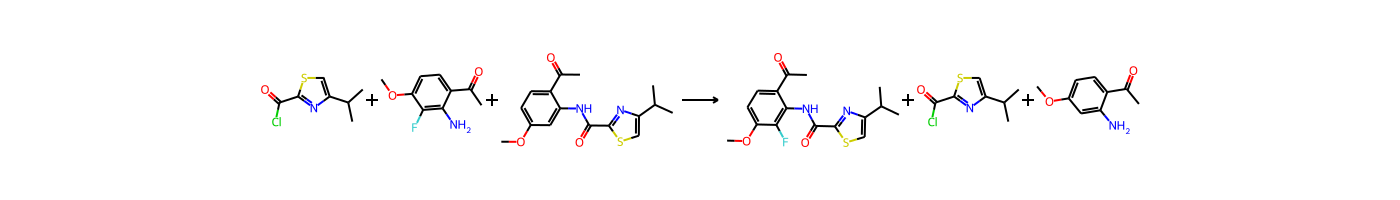

[0.10014867782592773, 0.14511938393115997, 0.06541084498167038, 0.3667789697647095, 0.18834787607192993, 0.1341942846775055]
[0.13856737315654755, 0.10279762744903564, 0.04587763547897339, 0.29723697900772095, 0.14619353413581848, 0.2693268656730652]


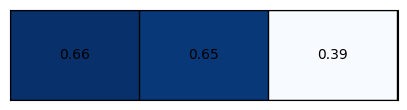

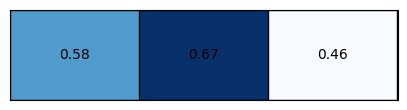

In [22]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import numpy as np
import itertools

idx_ini=0

#Original reaction
rsmi=data['rsmi'][0][0][idx_ini]
reaction= AllChem.ReactionFromSmarts(rsmi,useSmiles=True)
# print('Original reaction:')
display(Draw.ReactionToImage(reaction))
reactant=rsmi.split('>>')[0].split('.')
num_reactant=len(reactant)
product=rsmi.split('>>')[1].split('.')
num_product=len(product)

index_lst_r=[(m,m) for m in range(num_reactant)]
result_attention_r=[]
for i,j in itertools.combinations(range(num_reactant),2):
    index_lst_r.append((i,j))

index_lst_p=[(n,n) for n in range(num_product)]
result_attention_p=[]
for i,j in itertools.combinations(range(num_product),2):
    index_lst_p.append((i,j))
    

#Attention_Reactant
attention_r=data['Attention reactant'][idx_ini]
print(attention_r)
for idx in range(num_reactant):
    attention=0
    for idx_j,j in enumerate(index_lst_r):
        if idx in j:
            attention+=attention_r[idx_j]
    result_attention_r.append(np.round(attention,3))
    # print(f' The attention of {idx}th reactant is: {attention} ')
    # display(Draw.MolToImage(Chem.MolFromSmiles(reactant[idx])))
    
#Attention_Reactant
attention_p=data['Attention product'][idx_ini]
print(attention_p)
for idx in range(num_product):
    attention=0
    for idx_j,j in enumerate(index_lst_p):
        if idx in j:
            attention+=attention_p[idx_j]
    result_attention_p.append(np.round(attention,3))
    # print(f' The attention of {idx}th product is: {attention} ')
    # display(Draw.MolToImage(Chem.MolFromSmiles(product[idx])))
visualize_1d_heatmap(result_attention_r)
visualize_1d_heatmap(result_attention_p)
    


In [7]:
vector_a=np.array(data['emb'][0][0])
vector_b=np.array(data['emb'][0][1])
vector_c=np.array(data['emb'][0][2])

In [8]:
import numpy as np

def cosine_similarity(vector1, vector2):
  """
  Calculates the cosine similarity between two NumPy vectors.

  Args:
    vector1: A NumPy array representing the first vector.
    vector2: A NumPy array representing the second vector.

  Returns:
    The cosine similarity between the two vectors, or 0 if either vector is a zero vector.
  """
  # Ensure the vectors are NumPy arrays
  vector1 = np.asarray(vector1)
  vector2 = np.asarray(vector2)

  # Calculate the dot product
  dot_product = np.dot(vector1, vector2)

  # Calculate the L2 norms (magnitudes)
  norm_vector1 = np.linalg.norm(vector1)
  norm_vector2 = np.linalg.norm(vector2)

  # Handle the case where one or both vectors are zero vectors
  if norm_vector1 == 0 or norm_vector2 == 0:
    return 0 # Cosine similarity is undefined for zero vectors, often treated as 0

  # Calculate the cosine similarity
  similarity = dot_product / (norm_vector1 * norm_vector2)

  return similarity



# Calculate similarity between a and b
similarity_ab = cosine_similarity(vector_a, vector_b)
print(f"Cosine similarity between vector_a and vector_b: {similarity_ab}")

# Calculate similarity between a and c (zero vector)
similarity_ac = cosine_similarity(vector_a, vector_c)
print(f"Cosine similarity between vector_a and vector_c: {similarity_ac}")

# Calculate similarity between a and a (should be 1)
similarity_bc = cosine_similarity(vector_b, vector_c)
print(f"Cosine similarity between vector_a and vector_b: {similarity_bc}")


Cosine similarity between vector_a and vector_b: 0.9508269896988046
Cosine similarity between vector_a and vector_c: 0.9508269922130447
Cosine similarity between vector_a and vector_b: 0.9999999999999932


In [10]:
import torch.nn.functional as F 
import torch
print(F.cosine_similarity(torch.tensor(vector_a), torch.tensor(vector_b), dim=0))
print(F.cosine_similarity(torch.tensor(vector_a), torch.tensor(vector_c), dim=0))
print(F.cosine_similarity(torch.tensor(vector_b), torch.tensor(vector_c), dim=0))

tensor(0.9508, dtype=torch.float64)
tensor(0.9508, dtype=torch.float64)
tensor(1.0000, dtype=torch.float64)
